# Aprendizaje de maquina - TP 1

<h3>Importando bibliotecas</h3>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

<h3>Cargando datasets</h3>

In [6]:
url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
casos_df = pd.read_csv(url)


In [7]:
url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv'
camas_df = pd.read_csv(url)

<h3>Analisis exploratorio</h3>

<h4>Casos de covid</h4>

In [9]:
casos_df.tail()

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0
87,2020-09-25,3012,1512,1434,66,3738,298,417,1168,625,0


In [11]:
casos_df.dtypes

fecha                                object
confirmados                           int64
activos                               int64
recuperados                           int64
decesos                               int64
descartados                           int64
sospechosos                           int64
contencion_psicologica                int64
monitoreo_epidemiologico              int64
aislamiento_por_contacto_estrecho     int64
aprehendidos                          int64
dtype: object

El dataset tiene 11 variables y 88 registros. Todas las variables son numericas excepto la fecha, que esta como string. Esta ultima variable podria pasarse a formato de objeto temporal y acceder a los valores por dia

Calculando los distintos estadisticos para este dataset

In [24]:
casos_df.describe()

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,944.977273,403.738636,516.238636,25.000000,2007.647727,157.613636,407.295455,1360.386364,287.920455,0.0
std,741.951512,377.382561,369.502430,16.613248,951.537510,101.144080,21.174241,289.810181,113.161691,0.0
min,106.000000,29.000000,71.000000,6.000000,574.000000,22.000000,342.000000,1014.000000,169.000000,0.0
25%,422.000000,201.250000,164.000000,13.000000,1159.250000,96.000000,417.000000,1215.000000,206.250000,0.0
50%,706.500000,238.000000,502.000000,20.000000,1999.500000,122.000000,417.000000,1280.000000,246.500000,0.0
75%,1262.750000,487.750000,742.250000,32.750000,2794.500000,232.250000,417.000000,1374.750000,370.500000,0.0
max,3012.000000,1512.000000,1434.000000,66.000000,3738.000000,382.000000,417.000000,2377.000000,625.000000,0.0


Algo a notar de los estadisticos, es que poseen todos un gran valor en su desvio

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff55655be50>,
      dtype=object)

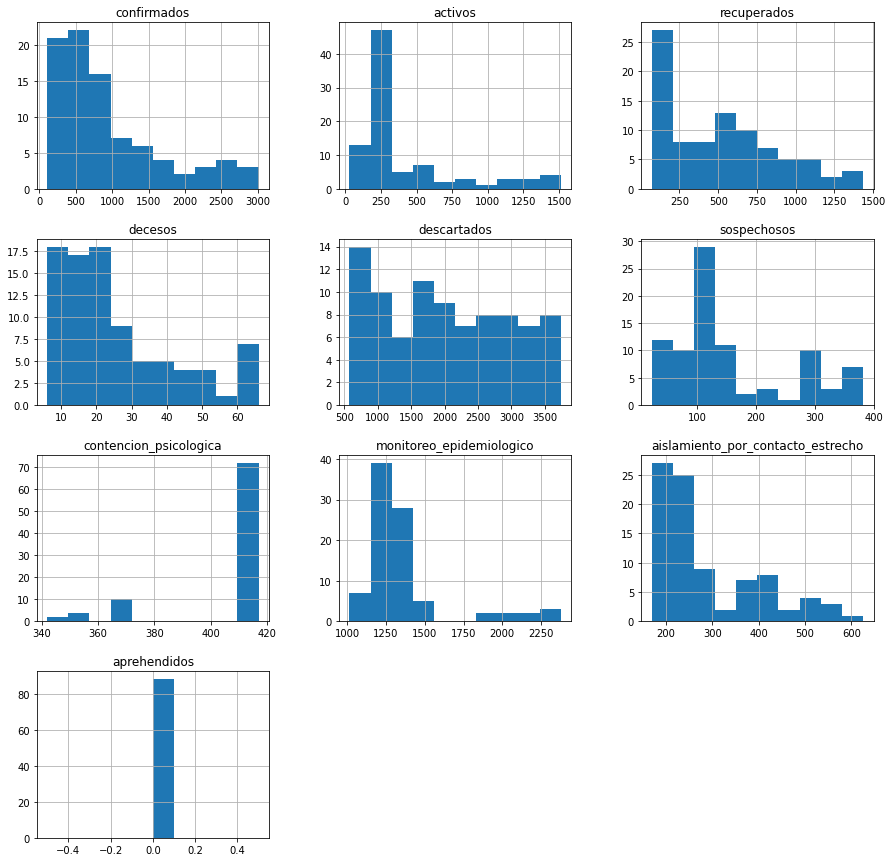

In [27]:
casos_df.hist(figsize=(15,15))

De estos graficos, se podria considerar que la variable 'monitoreo_epidemiologico' se comporta antes de 1750 como una posible variable gaussiana, pero no en su totalidad. Por otra parte, se puede notar que la variable 'aprehendidos' vale siempre 0. 

<h4>Camas covid</h4>

In [29]:
camas_df.tail()

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN
87,1,2020-06-30,848,347,40,155,15,10,16,32,1,143,23,0,0,137,0,3,NaN


In [30]:
camas_df.dtypes

informeNumero                             int64
fecha                                    object
total_camas_hospitales                    int64
camas_ocupadas_hospitales                 int64
porcentaje_ocupacion_camas_hospitales     int64
camas_covid                               int64
camas_sospechosos_covid                   int64
camas_confirmados_covid                   int64
porcentaje_ocupacion_camas_covid          int64
uti_covid_totales                         int64
uti_covid_ocupadas                        int64
respiradores_totales                      int64
respiradores_ocupados                     int64
respiradores_covid_totales                int64
respiradores_covid_ocupados               int64
total_camas_ucma                          int64
total_camas_ocupadas_ucma                 int64
sedes_ucma                                int64
observaciones                            object
dtype: object

El dataset tiene 19 variables y 88 registros. Todas las variables son numericas excepto observaciones y la fecha, que esta como string. Esta ultima variable podria pasarse a formato de objeto temporal y acceder a los valores por dia.

Calculando los estadisticos para este dataset

In [33]:
camas_df.describe()

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,70.670455,817.500000,350.159091,40.920455,162.068182,19.647727,34.909091,32.795455,31.636364,8.170455,137.181818,24.284091,39.943182,8.386364,144.159091,5.170455,3.715909
std,42.113072,155.002113,77.216502,9.006028,18.349603,6.586367,21.706843,15.509107,1.598719,7.014307,26.004220,8.541917,27.322408,7.529912,4.535648,4.334363,0.453565
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,3.000000
25%,30.750000,848.000000,325.750000,38.000000,163.000000,15.750000,20.000000,22.000000,32.000000,3.000000,142.000000,20.000000,0.000000,0.000000,137.000000,3.000000,3.000000
50%,87.500000,848.000000,367.500000,43.000000,163.000000,18.000000,25.000000,26.500000,32.000000,4.500000,142.000000,25.000000,54.000000,7.500000,147.000000,4.000000,4.000000
75%,109.250000,848.000000,391.000000,46.000000,163.000000,23.000000,52.250000,44.250000,32.000000,13.250000,142.000000,28.000000,62.000000,14.000000,147.000000,6.000000,4.000000
max,131.000000,851.000000,450.000000,53.000000,177.000000,42.000000,86.000000,77.000000,33.000000,24.000000,143.000000,43.000000,72.000000,25.000000,147.000000,21.000000,4.000000


En el caso de este dataset, algunas variables poseen un desvio chico, como por ejemplo 'porcentaje_ocupacion_camas_hospitales', 'camas_covid', 'uti_covid_totales' y 'total_camas_ucma'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff547211950>,
      dtype=object)

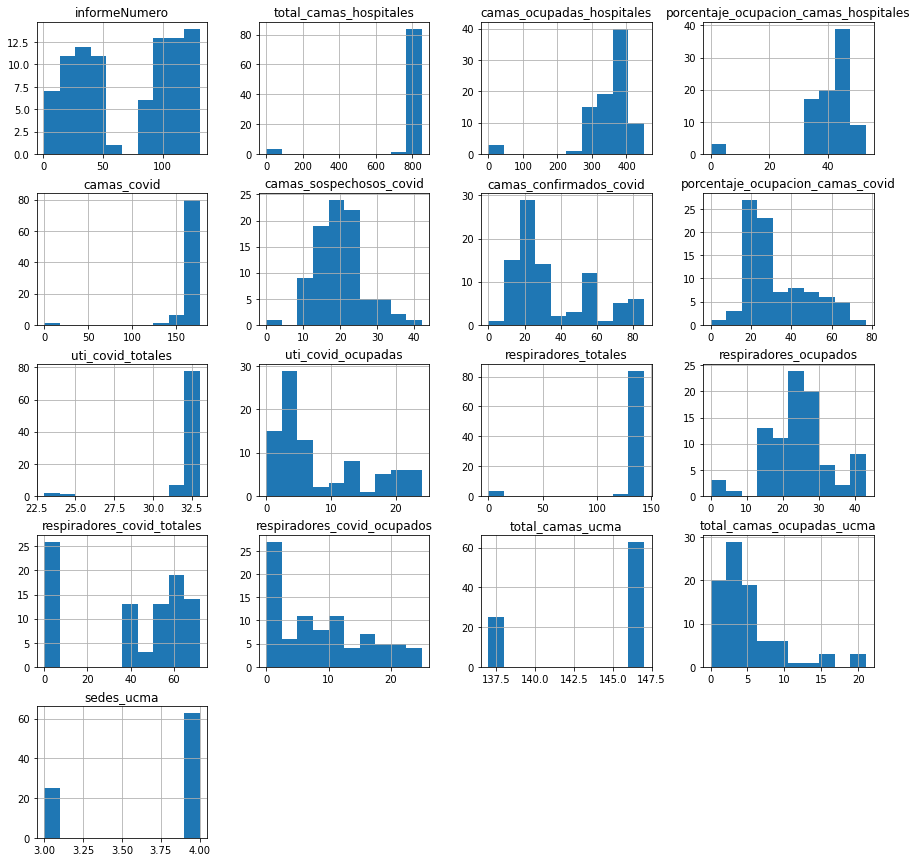

In [35]:
camas_df.hist(figsize=(15,15))

En este caso 'respiradores_ocupados' y 'camas_sospechosos_covid' podrian llegar a tener una distribucion gaussiana.

## Ejercicio 2

#### Definiendo las funciones a utilizar

In [490]:
def label_vector(value, shape):
  return np.full(
                 shape = shape,
                 fill_value = value,
                 dtype = np.object
                 )

In [491]:
def create_dataset(distribution_a, distribution_b, number_of_elements):
  data_a = {'value': distribution_a, 'label': label_vector('a', number_of_elements)}
  data_b = {'value': distribution_b, 'label': label_vector('b', number_of_elements)}
  dataset =  pd.DataFrame(data = data_a).append(pd.DataFrame(data = data_b))
  return dataset.sort_values(by='value', ascending = True)

#### Eligiendo la cantidad de elementos y creando las dos distribuciones

In [501]:
number_of_elements = 50

In [502]:
distribution_a = np.random.normal(10, 2, number_of_elements)
distribution_b = np.random.normal(15, 4, number_of_elements)

Graficando las distribuciones

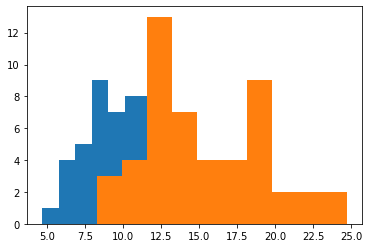

In [503]:
plt.hist(distribution_a)
plt.hist(distribution_b)
plt.show()

#### Creando el dataset

In [504]:
dataset = create_dataset(distribution_a, distribution_b, number_of_elements)

In [505]:
dataset

,value,label
13,4.698049,a
35,6.117043,a
15,6.444000,a
19,6.775453,a
11,6.832110,a
...,...,...
38,21.107257,b
0,21.474315,b
24,21.909005,b
3,23.747585,b


### Graficando la ROC

In [506]:
tpr = np.zeros(51) 
fpr = np.linspace(0, 1, num = 51)
tpr_value = 0
dx = 1

In [507]:
for index, row in dataset.iterrows():
  if row['label'] == 'a':
    tpr_value =  tpr_value + 1
    tpr[dx] = tpr_value
  else:
    tpr[dx] = tpr_value
    dx = dx + 1 

Text(0.5, 0.98, 'Curva ROC')

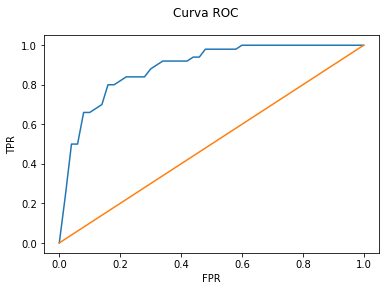

In [508]:
plt.plot(fpr, np.array(tpr)/50)
plt.plot(fpr, fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.suptitle('Curva ROC')

Debido a la aleatoriedad de la generacion y al mezclado, la curva ROC varia con cada corrida. Cuanto mas se superpongan las gaussianas, peor es la curva ROC. De esta forma, si las gaussianas no se superponen, la ROC sera perfecta, y si ambas se superponen (por ejemplo ambas gaussianas son iguales), la curva ROC sera la peor posible.

Para encontrar automaticamente el umbral, debo generar un algoritmo que recorra los valores de TPR y FPR y encuentre el punto donde el TPR es maximo y el FPR es minimo. Esto se lograr buscando el punto donde se minimiza la siguiente funcion:
f = TPR - (1 - FPR)

Por lo que se podria evaluar dicha funcion en cada punto, y devolver los valores donde esta es minima.